In [4]:
!pip install feature_engine

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV




In [6]:
df = pd.read_csv('/content/Coffe_sales.csv',index_col=0)
df.head()

,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
hour_of_day,,,,,,,,,,
10,card,38.7,Latte,Morning,Fri,Mar,5,3,3/1/2024,15:50.5
12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,3/1/2024,19:22.5
12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,3/1/2024,20:18.1
13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,3/1/2024,46:33.0
13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,3/1/2024,48:14.6


In [7]:
df.shape

(3547, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3547 entries, 10 to 18
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cash_type    3547 non-null   object 
 1   money        3547 non-null   float64
 2   coffee_name  3547 non-null   object 
 3   Time_of_Day  3547 non-null   object 
 4   Weekday      3547 non-null   object 
 5   Month_name   3547 non-null   object 
 6   Weekdaysort  3547 non-null   int64  
 7   Monthsort    3547 non-null   int64  
 8   Date         3547 non-null   object 
 9   Time         3547 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 304.8+ KB


In [9]:
df.columns

Index(['cash_type', 'money', 'coffee_name', 'Time_of_Day', 'Weekday',
       'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

,0
cash_type,0
money,0
coffee_name,0
Time_of_Day,0
Weekday,0
Month_name,0
Weekdaysort,0
Monthsort,0
Date,0
Time,0


In [12]:
# OUTLIERS
num_col = df.select_dtypes(include = [np.number]).columns
for col in num_col:
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower = df[col].quantile(0.25) - (1.5 * iqr)
    upper = df[col].quantile(0.75) + (1.5 * iqr)
    outliers = np.where(df[col] > upper, True, np.where(df[col] < lower, True, False))
    print(f"outliers in {col}: {outliers.sum()}")

outliers in money: 0
outliers in Weekdaysort: 0
outliers in Monthsort: 0


Sales by Hour of day


/tmp/ipython-input-626909348.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour_of_day', y='money', data=df, estimator=sum, palette='coolwarm')


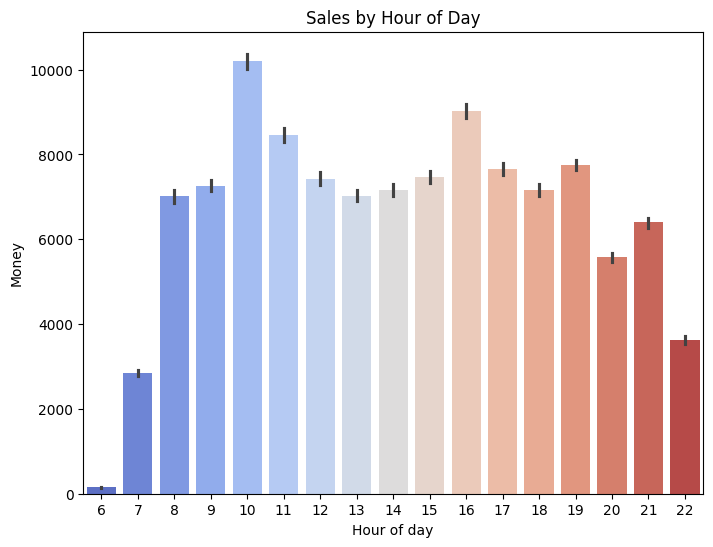

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x='hour_of_day', y='money', data=df, estimator=sum, palette='coolwarm')
plt.title('Sales by Hour of Day')
plt.xlabel('Hour of day')
plt.ylabel('Money')
plt.show()

Sales by Coffee Type


/tmp/ipython-input-2172358035.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='coffee_name',y='money',data=df,estimator=sum, palette='viridis', ci=None)
/tmp/ipython-input-2172358035.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coffee_name',y='money',data=df,estimator=sum, palette='viridis', ci=None)


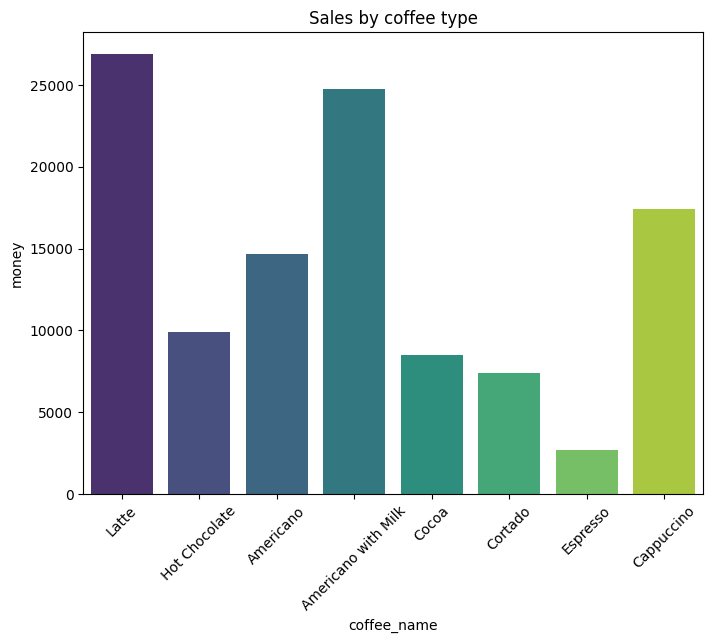

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(x='coffee_name',y='money',data=df,estimator=sum, palette='viridis', ci=None)
plt.title('Sales by coffee type')
plt.xticks(rotation=45)
plt.ylabel('money')
plt.show()

Sales by Cash Type


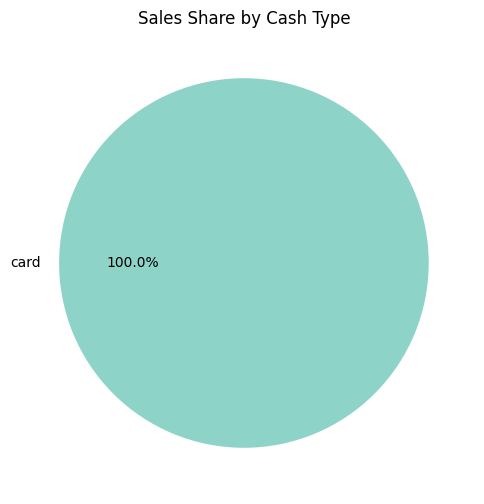

In [15]:
plt.figure(figsize=(6,6))
df.groupby("cash_type")["money"].sum().plot(kind="pie", autopct="%.1f%%", cmap="Set3")
plt.ylabel("")
plt.title("Sales Share by Cash Type")
plt.show()

Sales by Day of Week


/tmp/ipython-input-4282198181.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Weekday',y='money',data=df,estimator=sum, palette='mako',ci=None,order=df.sort_values('Weekdaysort')['Weekday'].unique())
/tmp/ipython-input-4282198181.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weekday',y='money',data=df,estimator=sum, palette='mako',ci=None,order=df.sort_values('Weekdaysort')['Weekday'].unique())


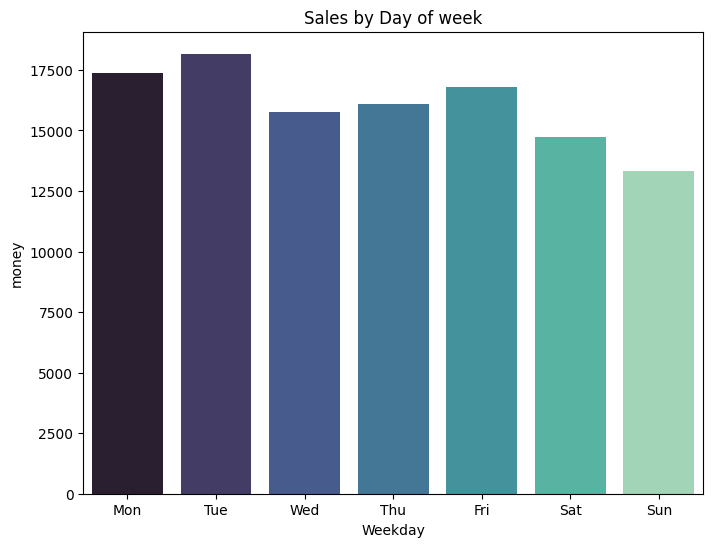

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x='Weekday',y='money',data=df,estimator=sum, palette='mako',ci=None,order=df.sort_values('Weekdaysort')['Weekday'].unique())
plt.title('Sales by Day of week')
plt.show()

Monthly Sales Trend


/tmp/ipython-input-1509989025.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Month_name", y="money", data=df, estimator=sum, ci=None,
/tmp/ipython-input-1509989025.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Month_name", y="money", data=df, estimator=sum, ci=None,


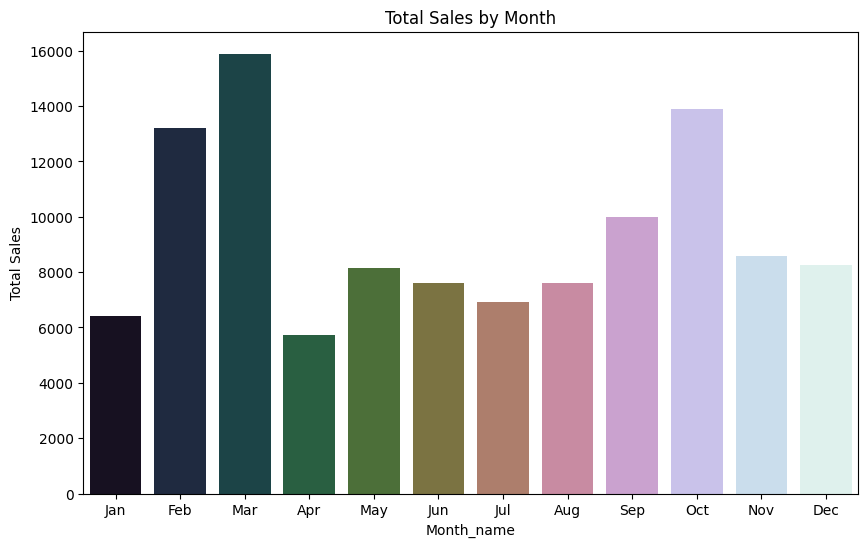

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x="Month_name", y="money", data=df, estimator=sum, ci=None,
            order=df.sort_values("Monthsort")["Month_name"].unique(), palette="cubehelix")
plt.title("Total Sales by Month")
plt.ylabel("Total Sales")
plt.show()

Time of Day Analysis (Morning/Afternoon/Evening/Night)


/tmp/ipython-input-1497747324.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Time_of_Day", y="money", data=df, estimator=sum, ci=None, palette="pastel")
/tmp/ipython-input-1497747324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Time_of_Day", y="money", data=df, estimator=sum, ci=None, palette="pastel")


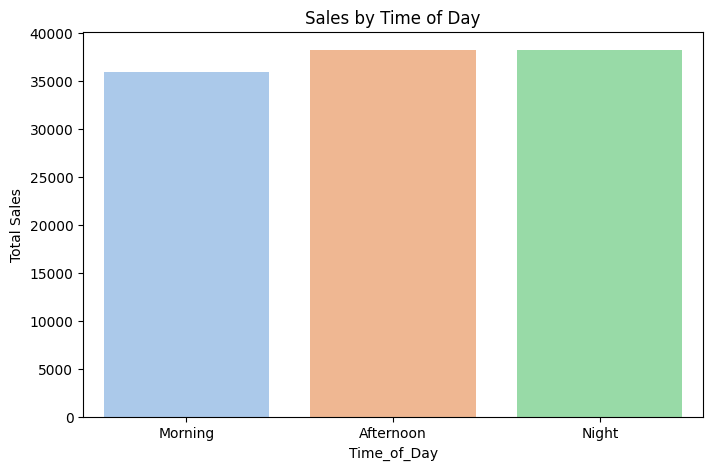

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x="Time_of_Day", y="money", data=df, estimator=sum, ci=None, palette="pastel")
plt.title("Sales by Time of Day")
plt.ylabel("Total Sales")
plt.show()

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df['Weekday'] = df['Date'].dt.day
df['Month_name'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [20]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

df['Hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute
df['second'] = df['Time'].dt.second
df.drop(columns='Time', axis=1)

/tmp/ipython-input-4130491923.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce')


,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Year,Hour,minute,second
hour_of_day,,,,,,,,,,,,,
10,card,38.70,Latte,Morning,1,3,5,3,2024-03-01,2024,15.0,50.0,30.0
12,card,38.70,Hot Chocolate,Afternoon,1,3,5,3,2024-03-01,2024,19.0,22.0,30.0
12,card,38.70,Hot Chocolate,Afternoon,1,3,5,3,2024-03-01,2024,20.0,18.0,6.0
13,card,28.90,Americano,Afternoon,1,3,5,3,2024-03-01,2024,NaN,NaN,NaN
13,card,38.70,Latte,Afternoon,1,3,5,3,2024-03-01,2024,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,card,35.76,Cappuccino,Morning,23,3,7,3,2025-03-23,2025,NaN,NaN,NaN
14,card,35.76,Cocoa,Afternoon,23,3,7,3,2025-03-23,2025,NaN,NaN,NaN
14,card,35.76,Cocoa,Afternoon,23,3,7,3,2025-03-23,2025,NaN,NaN,NaN


In [21]:
df.columns

Index(['cash_type', 'money', 'coffee_name', 'Time_of_Day', 'Weekday',
       'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time', 'Year',
       'Hour', 'minute', 'second'],
      dtype='object')

ENCODING CATEGORICAL VARIABLES



In [22]:
df_new = pd.get_dummies(df, columns=['cash_type','coffee_name','Weekday','Time_of_Day','Month_name'],drop_first=True)


In [23]:
df_new.head()

,money,Weekdaysort,Monthsort,Date,Time,Year,Hour,minute,second,coffee_name_Americano with Milk,...,Month_name_3,Month_name_4,Month_name_5,Month_name_6,Month_name_7,Month_name_8,Month_name_9,Month_name_10,Month_name_11,Month_name_12
hour_of_day,,,,,,,,,,,,,,,,,,,,,
10,38.7,5,3,2024-03-01,2025-10-06 15:50:30,2024,15.0,50.0,30.0,False,...,True,False,False,False,False,False,False,False,False,False
12,38.7,5,3,2024-03-01,2025-10-06 19:22:30,2024,19.0,22.0,30.0,False,...,True,False,False,False,False,False,False,False,False,False
12,38.7,5,3,2024-03-01,2025-10-06 20:18:06,2024,20.0,18.0,6.0,False,...,True,False,False,False,False,False,False,False,False,False
13,28.9,5,3,2024-03-01,NaT,2024,NaN,NaN,NaN,False,...,True,False,False,False,False,False,False,False,False,False
13,38.7,5,3,2024-03-01,NaT,2024,NaN,NaN,NaN,False,...,True,False,False,False,False,False,False,False,False,False


In [24]:
X = df_new.drop(columns=['money','Date'],axis=1)
Y = df_new['money']

In [25]:
X = X.select_dtypes(include=[np.number, np.bool_])


In [26]:
print(X.dtypes)

Weekdaysort                          int64
Monthsort                            int64
Year                                 int32
Hour                               float64
minute                             float64
second                             float64
coffee_name_Americano with Milk       bool
coffee_name_Cappuccino                bool
coffee_name_Cocoa                     bool
coffee_name_Cortado                   bool
coffee_name_Espresso                  bool
coffee_name_Hot Chocolate             bool
coffee_name_Latte                     bool
Weekday_2                             bool
Weekday_3                             bool
Weekday_4                             bool
Weekday_5                             bool
Weekday_6                             bool
Weekday_7                             bool
Weekday_8                             bool
Weekday_9                             bool
Weekday_10                            bool
Weekday_11                            bool
Weekday_12 

In [27]:
cols_to_impute = ['Hour', 'minute', 'second']

# استخدام الوسيط (Median) للإكمال
# الوسيط هو الأكثر أمانًا للبيانات الرقمية
for col in cols_to_impute:
    # نقوم بحساب الوسيط ثم ملء القيم المفقودة به
    median_value = X[col].median()
    X[col].fillna(median_value, inplace=True)

# التأكد من عدم وجود قيم مفقودة في X بعد الإكمال
print("القيم المفقودة في X بعد الإكمال:")
print(X.isnull().sum().loc[cols_to_impute])


القيم المفقودة في X بعد الإكمال:
Hour      0
minute    0
second    0
dtype: int64


/tmp/ipython-input-1427426107.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(median_value, inplace=True)


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
print(X_train.isnull().sum())


Weekdaysort                        0
Monthsort                          0
Year                               0
Hour                               0
minute                             0
second                             0
coffee_name_Americano with Milk    0
coffee_name_Cappuccino             0
coffee_name_Cocoa                  0
coffee_name_Cortado                0
coffee_name_Espresso               0
coffee_name_Hot Chocolate          0
coffee_name_Latte                  0
Weekday_2                          0
Weekday_3                          0
Weekday_4                          0
Weekday_5                          0
Weekday_6                          0
Weekday_7                          0
Weekday_8                          0
Weekday_9                          0
Weekday_10                         0
Weekday_11                         0
Weekday_12                         0
Weekday_13                         0
Weekday_14                         0
Weekday_15                         0
W

In [30]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    print(name)
    print("RMSE:", mean_squared_error(Y_test, preds))
    print("R2 Score:", r2_score(Y_test, preds))


Linear Regression
RMSE: 0.2489955531292677
R2 Score: 0.9891157543865174
Random Forest
RMSE: 0.1786766034929577
R2 Score: 0.9921895792380254
XGBoost
RMSE: 0.157638686029706
R2 Score: 0.9931092015284175


In [31]:
rf_model = models["Random Forest"].fit(X_train, Y_train)

importances = rf_model.feature_importances_
feat_im = pd.DataFrame({'Feature': X_train.columns, 'importance': importances})
feat_im = feat_im.sort_values('importance', ascending=False)

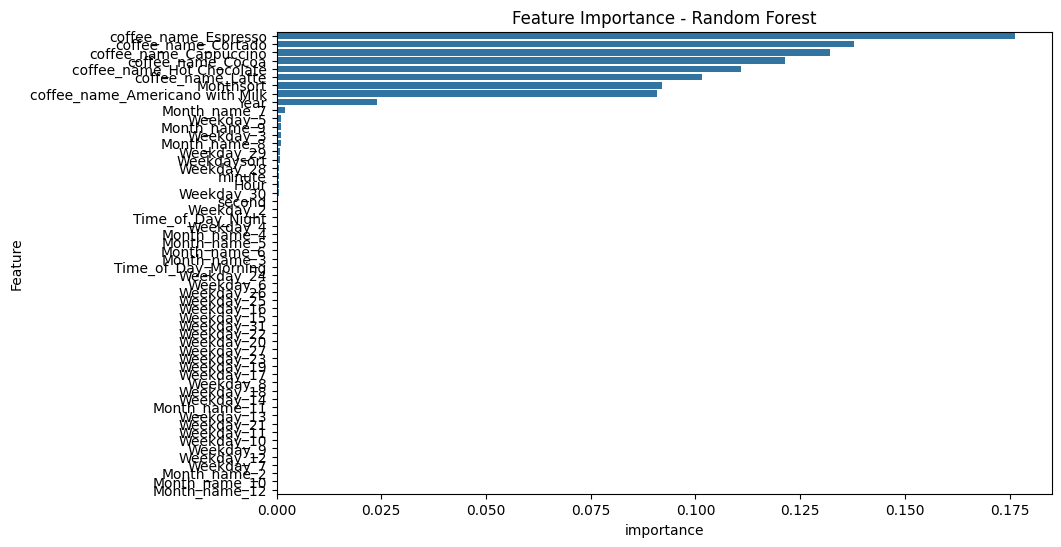

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="Feature", data=feat_im)
plt.title("Feature Importance - Random Forest")
plt.yticks(rotation=0)
plt.show()


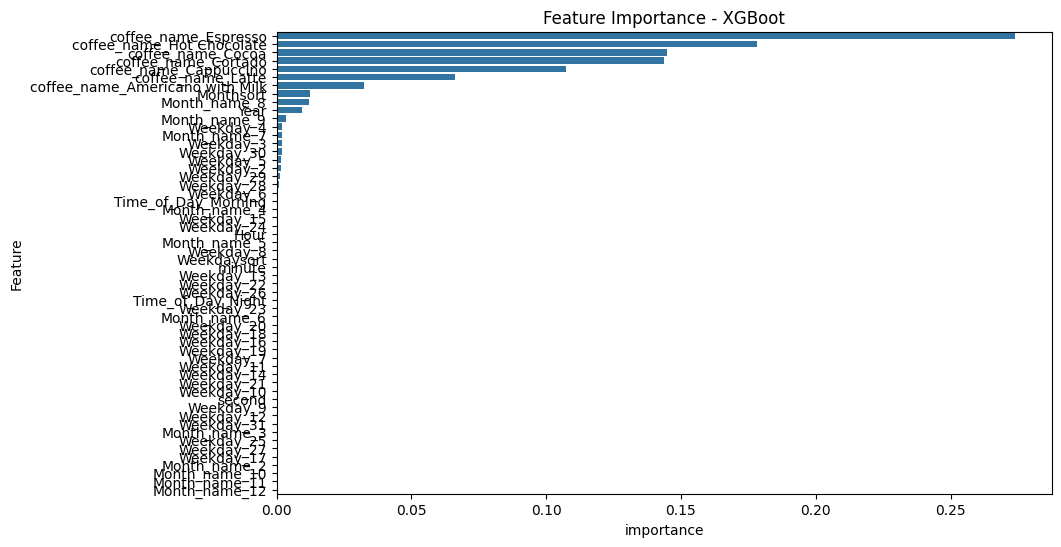

In [33]:
rf_model = models['XGBoost'].fit(X_train, Y_train)
importances = rf_model.feature_importances_
feat_im = pd.DataFrame({'Feature':X_train.columns,'importance':importances})
feat_im = feat_im.sort_values('importance',ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="Feature", data=feat_im)
plt.title("Feature Importance - XGBoot")
plt.show()

In [34]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = RandomizedSearchCV(
    rf, param_grid, n_iter=10, cv=3, scoring="r2", random_state=42, n_jobs=-1
)
grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best Score: 0.9909091999886445


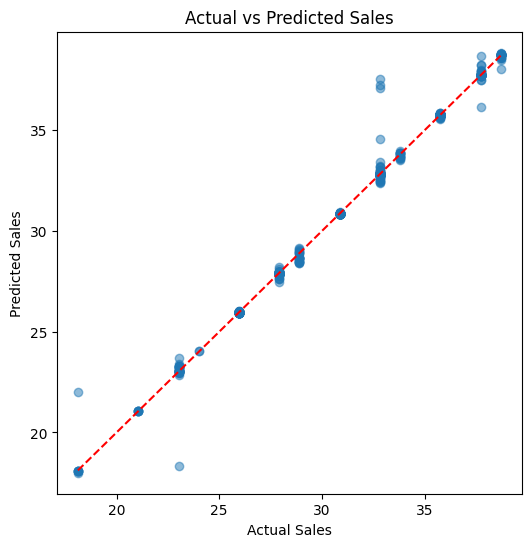

In [35]:
best_model = rf_model  # replace with tuned model

y_pred = best_model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

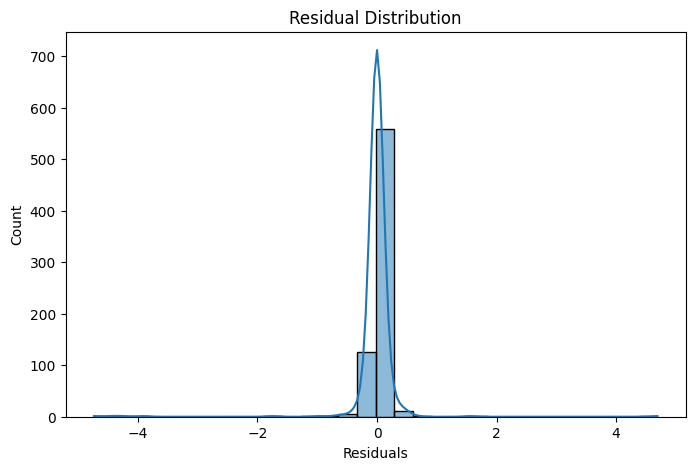

In [36]:
residuals = Y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()